In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [15]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [16]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [20]:
X_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [21]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [22]:
X_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,20.0
493,71.0,49.5042,71.0
527,NaN,221.7792,30.0


In [24]:
import seaborn as sns

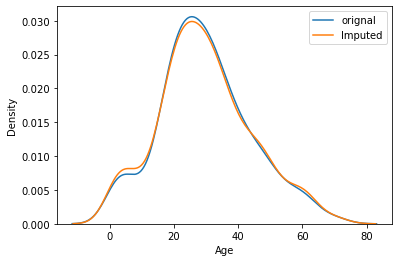

In [31]:
sns.kdeplot(X_train['Age'],label = 'orignal')
sns.kdeplot(X_train['Age_Imputed'],label = 'Imputed').legend()

In [35]:
print('Original variable Variance : ',X_train['Age'].var())
print('Imputed Variable Variance : ',X_train['Age_Imputed'].var())

Original variable Variance :  204.34951339046142
Imputed Variable Variance :  213.99174233790043


In [36]:
# Age Covariance will get affected
X_train.cov()

,Age,Fare,Age_Imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,61.590925
Age_Imputed,204.349513,61.590925,213.991742


<AxesSubplot:>

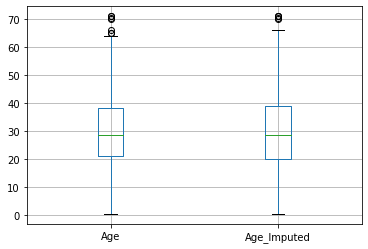

In [37]:
X_train[['Age','Age_Imputed']].boxplot()

In [38]:
sample_value = X_train['Age'].dropna().sample(1, random_state = int(observation['Fare']))

NameError: name 'observation' is not defined

In [39]:
data = pd.read_csv('house-train.csv' , usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [40]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [41]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [54]:
X = data
y = data['SalePrice']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)  

In [56]:
X_train['GarageQual_imputed'] = X_train['GarageQual'] 
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'] 

In [57]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1224,Gd,TA,184000,TA,Gd
821,NaN,TA,93000,TA,NaN
1172,NaN,TA,171900,TA,NaN
309,Ex,TA,360000,TA,Ex
1047,NaN,TA,145000,TA,NaN


In [58]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


C:\Users\Abhishek\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abhishek\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\Abhishek\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abhishek\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
X_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1192,NaN,TA,125000,TA,Gd
395,NaN,TA,129000,TA,Gd
155,NaN,NaN,79000,TA,Gd
700,Gd,TA,312500,TA,Gd
874,NaN,TA,66500,TA,Gd
1195,NaN,TA,176000,TA,TA
242,NaN,Fa,79000,Fa,TA
761,NaN,TA,100000,TA,Gd
196,Gd,TA,311872,TA,Gd
1230,TA,TA,190000,TA,TA


In [62]:
# Calculating the frequency of categorical variables before imputation and after imputation

temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train )
],axis =1)

temp.columns = ['Original',"Imputed"]

In [63]:
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Ex,0.000907,0.000856
Po,0.000907,0.000856


In [66]:

temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train )
],axis =1)

temp.columns = ['Original',"Imputed"]

In [67]:
temp

,Original,Imputed
Gd,0.494272,0.487158
TA,0.412439,0.419521
Fa,0.040917,0.041096
Po,0.027823,0.028253
Ex,0.024550,0.023973


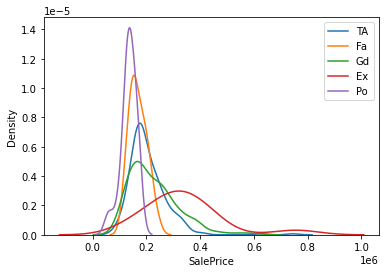

In [69]:
for  category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu']== category]['SalePrice'] , label = category).legend()
plt.show()

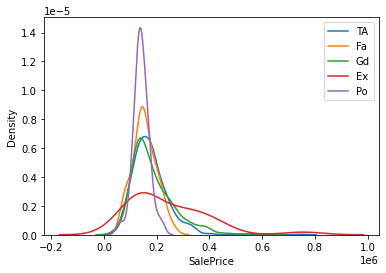

In [70]:
for  category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed']== category]['SalePrice'] , label = category).legend()
plt.show()

***SO for FireplaceQual column we should not use Random Sample imputation technique as the there is alot of missing data and it changes the distribution of the feature so don't use it when comes to linear models whereas GarageQual is having less missing data so it can be used.***